In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

In [ ]:
# The relevant Nifty sector indices and their ticker symbols
nifty_indices = {
    'Nifty Auto': '^CNXAUTO',
    'NIFTY ENERGY': '^CNXENERGY',
    'Nifty FMCG': '^CNXFMCG',
    'Nifty IT': '^CNXIT',
    'Nifty Media': '^CNXMEDIA',
    'Nifty Metal': '^CNXMETAL',
    'Nifty PSU Bank': '^CNXPSUBANK',
    'Nifty Realty': '^CNXREALTY',
    'NIFTY BANK': '^NSEBANK',
    'NIFTY MEDIA': '^CNXMEDIA',
    'NIFTY CONSUMPTION': '^CNXCONSUM',
    'NIFTY MNC': '^CNXMNC',
    'NIFTY PSE': '^CNXPSE',
    'NIFTY COMMODITIES': '^CNXCMDT',
    'NIFTY SERV SECTOR': '^CNXSERVICE'
}

# ARIMA

Autoregressive Integrated Moving Average

We will perform ARIMA on the closing prices of each of the Nifty sector stocks and forcast for the next two years and then compare to nifty fifty.



---



**Some pre-requisites:**

1. ACF Plot - identifies till which lag period/variable, the autocorrelations are significant, and this value is given by $q$

2. PACF Plot - identifies till which lag period/variable, the partial autocorrelation is significant, and this is given by $p$

3. $d$ - differencing factor



---


We will be using the **auto_arima** library in order to find values of $p,d,q$ for each of our nifty stocks (maybe)

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.0 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
import itertools
import statsmodels.api as sm

In [ ]:
#making a loop to take in data of first 8 years
#then forcast using ARIMA
#and finally compare with Nifty 50


# Set the start and end dates for the first 8 years
end_date_8 = datetime.today() - timedelta(days=2*365)
start_date_8 = datetime.today() - timedelta(days=10*365)


# Dictionary to hold data, closing prices and forecast frame for each index
data_8 = {}
prices_8 = {}
forecast_df = {}

NSEI_data = yf.download('^NSEI', start=end_date, end=date.today())


# Download the data for each index
for index_name, ticker in nifty_indices.items():

    #extracting first 8 years
    data_8[index_name] = yf.download(ticker, start=start_date_8, end=end_date_8)
    data_8[index_name] = pd.DataFrame(data_8[index_name]) # just making sure they are converted to data frames

    #extracting prices
    prices_8[index_name] = data_8[index_name].reset_index()['Close']

    #dropping any NaN values
    prices_8[index_name] = prices_8[index_name].dropna()


    #to obtain p,d,q
    model = auto_arima(prices_8[index_name], start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,
                      d=1,
                      seasonal=False,
                      start_P=0,
                      D=None,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)


    #to forecast


    # Forecast the next two years
    forecast_period = len(NSEI_data)
    forecast_df[index_name] = pd.DataFrame(model.predict(n_periods=forecast_period), index = prices_8[index_name].index)
    forecast_df[index_name].columns = ['Forcasting Closing Price']

    print(forecast_df[index_name])




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24377.582, Time=1.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24376.525, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24376.193, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24376.281, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24375.246, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.224 seconds
      Forcasting Closing Price
0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
...                        ...
1952                       NaN
1953                       NaN
1954                       NaN
1955                       NaN
1956                       NaN

[1957 rows x 1 columns]


[*********************100%%**********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=26206.265, Time=2.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26203.193, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26204.287, Time=0.44 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26204.308, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26204.605, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 3.632 seconds
      Forcasting Closing Price
0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
...                        ...
1952                       NaN
1953                       NaN
1954                       NaN
1955                       NaN
1956                       NaN

[1957 rows x 1 columns]


[*********************100%%**********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27843.567, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27839.944, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27841.576, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27841.585, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27840.413, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.262 seconds
      Forcasting Closing Price
0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
...                        ...
1951                       NaN
1952                       NaN
1953                       NaN
1954                       NaN
1955                       NaN

[1956 rows x 1 columns]


[*********************100%%**********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=25029.461, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25025.783, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25027.466, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25027.465, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25025.101, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.282 seconds
      Forcasting Closing Price
0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
...                        ...
1670                       NaN
1671                       NaN
1672                       NaN
1673                       NaN
1674                       NaN

[1675 rows x 1 columns]


[*********************100%%**********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19689.528, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19687.706, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19688.829, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19688.798, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19685.710, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.672 seconds
      Forcasting Closing Price
0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
...                        ...
1952                       NaN
1953                       NaN
1954                       NaN
1955                       NaN
1956                       NaN

[1957 rows x 1 columns]


[*********************100%%**********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21772.643, Time=1.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21769.795, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21771.224, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21771.183, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21768.357, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.904 seconds
      Forcasting Closing Price
0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
...                        ...
1952                       NaN
1953                       NaN
1954                       NaN
1955                       NaN
1956                       NaN

[1957 rows x 1 columns]


[*********************100%%**********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21700.642, Time=1.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21698.957, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21700.554, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21700.546, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21697.213, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.948 seconds
      Forcasting Closing Price
0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
...                        ...
1952                       NaN
1953                       NaN
1954                       NaN
1955                       NaN
1956                       NaN

[1957 rows x 1 columns]


[*********************100%%**********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12302.473, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12307.457, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12300.476, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12300.514, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12305.850, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=12302.471, Time=0.70 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12304.474, Time=1.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=12298.816, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=12300.813, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=12300.814, Time=0.44 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=12298.857, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=12302.815, Time=0.56 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 4.867 seconds
      Forcasting Closing Price
0                          NaN
1             

[*********************100%%**********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=25095.807, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25094.738, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25094.240, Time=0.12 sec


[*********************100%%**********************]  1 of 1 completed

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25094.106, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25094.038, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.792 seconds
      Forcasting Closing Price
0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
...                        ...
1685                       NaN
1686                       NaN
1687                       NaN
1688                       NaN
1689                       NaN

[1690 rows x 1 columns]
Performing stepwise search to minimize aic


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19689.528, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19687.706, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19688.829, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19688.798, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19685.710, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.667 seconds
      Forcasting Closing Price
0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
...                        ...
1952                       NaN
1953                       NaN
1954                       NaN
1955                       NaN
1956                       NaN

[1957 rows x 1 columns]


[*********************100%%**********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20760.926, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20759.651, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20761.032, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20761.072, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20761.124, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.570 seconds
      Forcasting Closing Price
0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
...                        ...
1952                       NaN
1953                       NaN
1954                       NaN
1955                       NaN
1956                       NaN

[1957 rows x 1 columns]


[*********************100%%**********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24658.678, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24658.211, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24656.675, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24656.690, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24659.628, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=24658.674, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=24660.677, Time=0.38 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=24657.806, Time=0.10 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.548 seconds
      Forcasting Closing Price
0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
...                        ...
1952                       NaN
1953                       NaN
1954                       NaN
1955                       NaN
195

[*********************100%%**********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20322.862, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20329.524, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20325.270, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20324.680, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20327.557, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=20325.203, Time=1.34 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=20325.263, Time=0.99 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=20323.370, Time=1.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=20323.251, Time=0.59 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=20320.113, Time=3.48 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=20322.088, Time=4.49 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=20322.096, Time=4.69 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=20326.133, Time=3.32 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=20327.202, Time=1.02 sec
 ARIMA(3,1,3)(0,0,0

[*********************100%%**********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20629.927, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20626.524, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20627.946, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20627.936, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20626.034, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.055 seconds
      Forcasting Closing Price
0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
...                        ...
1952                       NaN
1953                       NaN
1954                       NaN
1955                       NaN
1956                       NaN

[1957 rows x 1 columns]


[*********************100%%**********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=25875.548, Time=3.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25875.113, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25876.827, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25876.807, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25875.692, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 3.872 seconds
      Forcasting Closing Price
0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
...                        ...
1952                       NaN
1953                       NaN
1954                       NaN
1955                       NaN
1956                       NaN

[1957 rows x 1 columns]


Alternate

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Initial NaN values in prices data: 0
NaN values after dropping: 0
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24376.525, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24376.193, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24376.281, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24375.246, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24377.582, Time=1.72 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.807 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1957
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -12186.623
Date:                Thu, 23 May 2024   AIC                          24375.246
Time:                        03:10:38   BIC                          24380.825
Sample:                             0   HQIC                         24377.297
     

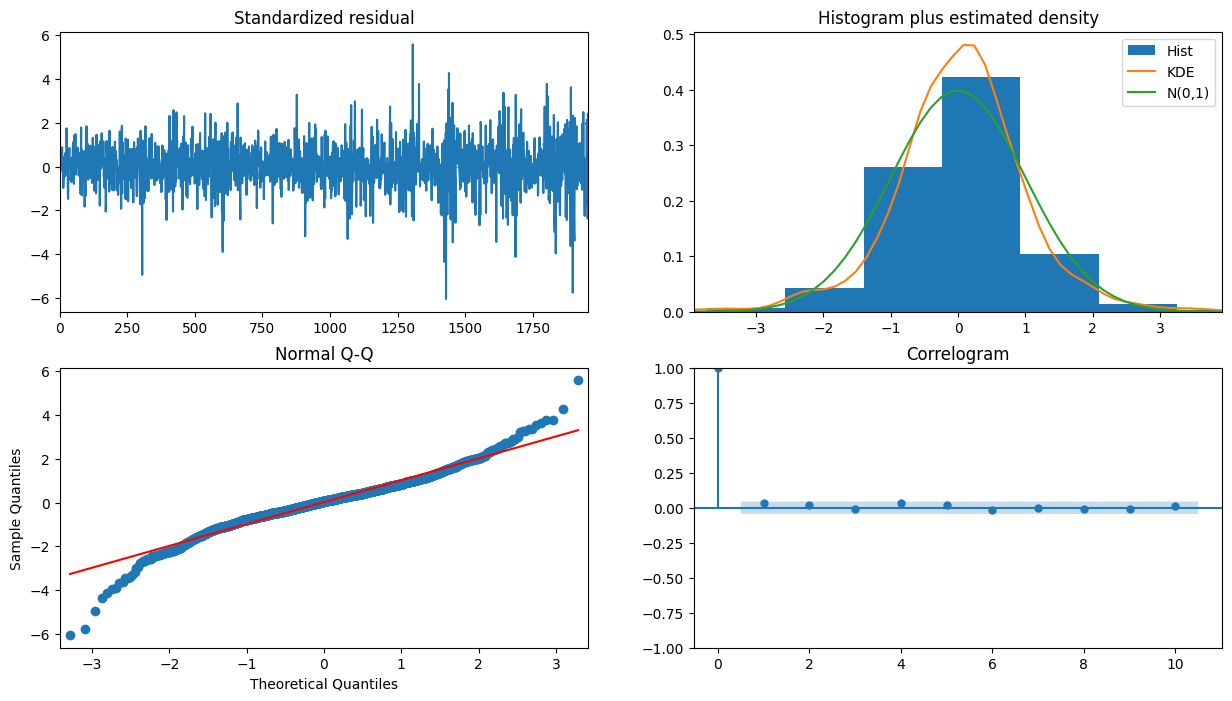

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1957
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -12186.623
Date:                Thu, 23 May 2024   AIC                          24375.246
Time:                        03:10:40   BIC                          24380.825
Sample:                             0   HQIC                         24377.297
                               - 1957                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.51e+04    294.726     51.230      0.000    1.45e+04    1.57e+04
Ljung-Box (L1) (Q):                   2.36   Jarque-Bera (JB):               964.21
Prob(Q):                              0.12   Pr

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


'\n#printing predictions for next 2*365 days\nindex_future_dates=pd.date_range(start= start_date, end=end_date, freq=\'D\')\nforecast_period = 2*365\nforecast, conf_int = model.predict(n_periods=forecast_period, return_conf_int=True)\n\n# Ensure forecast and confidence intervals are not NaN\nprint("Forecast NaN values:", pd.isna(forecast).sum())\nprint("Confidence Interval NaN values:", pd.isna(conf_int).sum())\n\n# Create a DataFrame for the forecast\nforecast_dates = pd.date_range(start=prices.index[-1] + pd.Timedelta(days=1), periods=forecast_period)\nforecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=[\'Forecast\'])\nconf_int_df = pd.DataFrame(conf_int, index=forecast_dates, columns=[\'Lower CI\', \'Upper CI\'])\n\n# Combine historical prices with forecast\ncombined_df = pd.concat([prices, forecast_df], axis=1)\n\ncombined_df\n\n'

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import pmdarima as pm
from dateutil.relativedelta import relativedelta

# Define the stock ticker and the time period
ticker = '^CNXAUTO',
end_date = date.today() - timedelta(days=2*365)
start_date = date.today() - timedelta(days=10*365)

# Fetch the historical data
stock_data = yf.download(ticker, start=start_date, end=end_date)
NSEI_data = yf.download('^NSEI', start=end_date, end=date.today())

# Use the 'Close' price for ARIMA modeling
prices = stock_data['Close']

# Check for NaN values and handle them
print("Initial NaN values in prices data:", prices.isna().sum())
prices = prices.dropna()
print("NaN values after dropping:", prices.isna().sum())

'''
# Ensure the index is a datetime index
if not isinstance(prices.index, pd.DatetimeIndex):
    prices.index = pd.to_datetime(prices.index)
'''

# Use auto_arima to find the optimal parameters
model = pm.auto_arima(prices, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

model.plot_diagnostics(figsize=(15,8))
plt.show()

fitted = model.fit(y=prices, disp=-1)
print(fitted.summary())

forecast = model.predict(steps=len(NSEI_data))


'''
forecast = model.predict(start=end_date, end=date.today())
index_of_fc = pd.date_range(pd.to_datetime(NSEI_data.index[-1])  + relativedelta(days = +1), periods = len(NSEI_data), freq = 'D')

#forecast = pd.DataFrame(forecast,index = NSEI_data.index,columns=['Prediction'])

data_fc.append(forecast)
data_fitted.append(model.fittedvalues())

df_fc = pd.DataFrame(index = index_of_fc)
df_fitted = pd.DataFrame(index = NSEI_data.index)

df_fc = data_fc[0][:]
'''

"""
#printing predictions for next 2*365 days
index_future_dates=pd.date_range(start= start_date, end=end_date, freq='D')
forecast_period = 2*365
forecast, conf_int = model.predict(n_periods=forecast_period, return_conf_int=True)

# Ensure forecast and confidence intervals are not NaN
print("Forecast NaN values:", pd.isna(forecast).sum())
print("Confidence Interval NaN values:", pd.isna(conf_int).sum())

# Create a DataFrame for the forecast
forecast_dates = pd.date_range(start=prices.index[-1] + pd.Timedelta(days=1), periods=forecast_period)
forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=['Forecast'])
conf_int_df = pd.DataFrame(conf_int, index=forecast_dates, columns=['Lower CI', 'Upper CI'])

# Combine historical prices with forecast
combined_df = pd.concat([prices, forecast_df], axis=1)

combined_df

"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(prices, order=(0, 1, 0))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1957
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -12186.623
Date:                Thu, 23 May 2024   AIC                          24375.246
Time:                        03:07:22   BIC                          24380.825
Sample:                             0   HQIC                         24377.297
                               - 1957                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.51e+04    294.726     51.230      0.000    1.45e+04    1.57e+04
Ljung-Box (L1) (Q):                   2.36   Jarque-Bera (JB):               964.21
Prob(Q):                              0.12   Pr

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
fc = fitted.forecast(len(NSEI_data))
fc

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1957    11115.200195
1958    11115.200195
1959    11115.200195
1960    11115.200195
1961    11115.200195
            ...     
2444    11115.200195
2445    11115.200195
2446    11115.200195
2447    11115.200195
2448    11115.200195
Name: predicted_mean, Length: 492, dtype: float64

In [ ]:
fc_series = pd.Series(fc, index=NSEI_data.index)

Date
2022-05-24   NaN
2022-05-25   NaN
2022-05-26   NaN
2022-05-27   NaN
2022-05-30   NaN
              ..
2024-05-15   NaN
2024-05-16   NaN
2024-05-17   NaN
2024-05-21   NaN
2024-05-22   NaN
Name: predicted_mean, Length: 492, dtype: float64

It appears, that due to lack of proper documentation and no relevant sources to guide me through the process for working with ARIMA syntaxes, I am unable to work with ARIMA.

Although I understand the concept and am able to understand how to proceed further, it has become difficult to proceed further with this method due to the aformentioned reasons.